<a href="https://colab.research.google.com/github/Vovladimir/Numpy_Matplotlib_Scikit-learn/blob/final_solution/VSminov_solution_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Установка необходимых библиотек.**

In [ ]:
pip install catboost

     |████████████████████████████████| 69.2MB 66kB/s 


In [ ]:
import catboost as cb

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

**Первый этап:** загрузка и первичный анализ данных.


In [ ]:
from google.colab import files

uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
data_train = pd.read_csv('train.csv')

In [ ]:
files.upload()

Saving test.csv to test.csv


{'test.csv': b'Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2\r\n725,58,2.0,49.8826433899298,33.43278170333575,6.0,6,14.0,1972,0.31019913,B,B,11,2748,1,,0,0,B\r\n15856,74,2.0,69.26318347353308,,1.0,6,1.0,1977,0.075778755,B,B,6,1437,3,,0,2,B\r\n5480,190,1.0,13.597818501304127,15.94824639560224,12.0,2,5.0,1909,0.0,B,B,30,7538,87,4702.0,5,5,B\r\n15664,47,2.0,73.04660921472451,51.940841981703706,9.0,22,22.0,2007,0.101872465,B,B,23,4583,3,,3,3,B\r\n14275,27,1.0,47.52711070587538,43.38756921064506,1.0,17,17.0,2017,0.072157581,B,B,2,629,1,,0,0,A\r\n7633,53,1.0,40.675626539628134,,1.0,21,21.0,1977,0.049637257000000004,B,B,34,7759,0,229.0,1,3,B\r\n13329,23,2.0,68.09953793820145,64.84302502745639,1.0,2,17.0,1977,0.075778755,B,B,6,1437,3,,0,2,B\r\n5502,32,2.0,48.193897416881704,32.857643514967585,6.0,5,14.0,1972,0.135649789,B,B,46,7960,6,350.0,3,11,B\r\n4220,96,3.0,72.

In [ ]:
data_test = pd.read_csv('test.csv')

In [ ]:
#общий взгляд на данные
data_train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [ ]:
data_test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A


Анализ данныхна пропущенные значения, вероятные выбросы и аномалии в данных.


In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [ ]:
#Видим в признаках LifeSquare и Healthcare_1, что потребует обработки.

In [ ]:
data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,10000.0,8383.407700,4859.019020,0.000000,4169.500000,8394.500000,12592.500000,1.679800e+04
DistrictId,10000.0,50.400800,43.587592,0.000000,20.000000,36.000000,75.000000,2.090000e+02
Rooms,10000.0,1.890500,0.839512,0.000000,1.000000,2.000000,2.000000,1.900000e+01
Square,10000.0,56.315775,21.058732,1.136859,41.774881,52.513310,65.900625,6.410652e+02
LifeSquare,7887.0,37.199645,86.241209,0.370619,22.769832,32.781260,45.128803,7.480592e+03
KitchenSquare,10000.0,6.273300,28.560917,0.000000,1.000000,6.000000,9.000000,2.014000e+03
Floor,10000.0,8.526700,5.241148,1.000000,4.000000,7.000000,12.000000,4.200000e+01
HouseFloor,10000.0,12.609400,6.775974,0.000000,9.000000,13.000000,17.000000,1.170000e+02
HouseYear,10000.0,3990.166300,200500.261427,1910.000000,1974.000000,1977.000000,2001.000000,2.005201e+07
Ecology_1,10000.0,0.118858,0.119025,0.000000,0.017647,0.075424,0.195781,5.218671e-01


Видимо, проблемы с ***Rooms*** (наличие нулевых значений), низкие значения в ***Square***, там же большие значения, но нельзя исключить возможность больших площадей.
***LifeSquare*** - низкие значения и аномально высокие (больше максимальной общей площади).
***KitchenSquare*** - наличие нулевых значений в общем возможно, но больше чем общей площади - явная аномалия.
***HouseFloor*** - аномалии нулевых значений.
***HouseYear*** - аномально высокое максимальное значение.
Остальные категории сложно оценить из-за трудности интерпретации коэффициентов, непонятно возможны ли там нулевые значения.


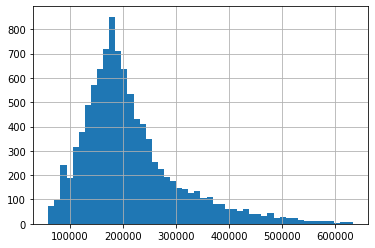

In [ ]:
data_train.Price.hist(bins=50)
#целевая переменная распределена со смещением, но в целом более менее нормально

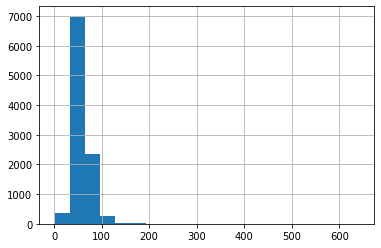

In [ ]:
#обработка Square
data_train.Square.hist(bins=20)

In [ ]:
data_train.Square.describe()

count    10000.000000
mean        56.315775
std         21.058732
min          1.136859
25%         41.774881
50%         52.513310
75%         65.900625
max        641.065193
Name: Square, dtype: float64

In [ ]:
data_train.Square.median()

52.51330992401352

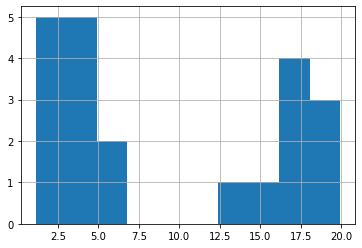

In [ ]:
data_train.loc[data_train.Square < 20, 'Square'].hist()
#значения меньше 10 заменим на медианные

In [ ]:
#значения меньше 10 заменим на медианные
def square_min_correct(X):
  X.loc[X.Square < 10, 'Square'] = X.Square.median()

In [ ]:
square_min_correct(data_train)
square_min_correct(data_test)

In [ ]:
data_train.Square.describe()

count    10000.000000
mean        56.374350
std         20.979981
min         13.784865
25%         41.794392
50%         52.513580
75%         65.900625
max        641.065193
Name: Square, dtype: float64

In [ ]:
#обработка нулевых значений Rooms
(data_train.loc[data_train.Rooms != 0, 'Square'] / data_train.loc[data_train.Rooms != 0, 'Rooms']).median()

30.835861390438687

In [ ]:
data_train.loc[data_train.Rooms == 0, 'Square']

1397    138.427694
1981    212.932361
2269     41.790881
3911     49.483501
4366     81.491446
4853     52.513310
6149     38.697117
8834     87.762616
Name: Square, dtype: float64

In [ ]:
#замена нулевых значений на медианное
def rooms_null_correct(X):
  X.loc[X.Rooms == 0, 'Rooms'] = X.loc[X.Rooms == 0, 'Square'] / (X.loc[X.Rooms != 0, 'Square'] / X.loc[X.Rooms != 0, 'Rooms']).median()

In [ ]:
rooms_null_correct(data_train)

In [ ]:
rooms_null_correct(data_test)

In [ ]:
data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,10000.0,8383.407700,4859.019020,0.000000,4169.500000,8394.500000,12592.500000,1.679800e+04
DistrictId,10000.0,50.400800,43.587592,0.000000,20.000000,36.000000,75.000000,2.090000e+02
Rooms,10000.0,1.892780,0.839842,1.000000,1.000000,2.000000,2.000000,1.900000e+01
Square,10000.0,56.374350,20.979981,13.784865,41.794392,52.513580,65.900625,6.410652e+02
LifeSquare,7887.0,37.199645,86.241209,0.370619,22.769832,32.781260,45.128803,7.480592e+03
KitchenSquare,10000.0,6.273300,28.560917,0.000000,1.000000,6.000000,9.000000,2.014000e+03
Floor,10000.0,8.526700,5.241148,1.000000,4.000000,7.000000,12.000000,4.200000e+01
HouseFloor,10000.0,12.609400,6.775974,0.000000,9.000000,13.000000,17.000000,1.170000e+02
HouseYear,10000.0,3990.166300,200500.261427,1910.000000,1974.000000,1977.000000,2001.000000,2.005201e+07
Ecology_1,10000.0,0.118858,0.119025,0.000000,0.017647,0.075424,0.195781,5.218671e-01


In [ ]:
#обработка нулевых значений HouseFloor
def floor_null(X):

    house_floor_null = np.where(X.HouseFloor==0)[0]

    X.loc[house_floor_null,['HouseFloor']] = X.Floor.median()

In [ ]:
#обработка LifeSquare
data_train.LifeSquare.describe()

count    7887.000000
mean       37.199645
std        86.241209
min         0.370619
25%        22.769832
50%        32.781260
75%        45.128803
max      7480.592129
Name: LifeSquare, dtype: float64

In [ ]:
data_train.LifeSquare.isna().sum()

2113

In [ ]:
#замена пропусков на медианное
data_train.LifeSquare.fillna(data_train.LifeSquare.median(),inplace=True)

In [ ]:
data_train.LifeSquare.isna().sum()

0

In [ ]:
data_test.LifeSquare.fillna(data_test.LifeSquare.median(),inplace=True)

In [ ]:
data_test.LifeSquare.isna().sum()

0

In [ ]:
#обработам аномальные значения
data_train.loc[data_train.LifeSquare > data_train.Square].head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
28,8054,23,1.0,42.530043,43.967759,1.0,3,9.0,2014,0.034656,B,B,0,168,0,NaN,0,0,B,95338.198549
44,10521,38,3.0,104.211396,106.340403,0.0,20,0.0,2017,0.060753,B,B,15,2787,2,520.0,0,7,B,435462.048070
52,2301,1,2.0,61.400054,65.224603,0.0,17,22.0,2016,0.007122,B,B,1,264,0,NaN,0,1,B,199215.452229
123,8753,25,3.0,85.952306,89.803753,1.0,4,3.0,2017,0.069753,B,B,53,13670,4,NaN,1,11,B,309688.592681
153,9870,62,1.0,51.831473,53.491301,1.0,5,1.0,2015,0.072158,B,B,2,629,1,NaN,0,0,A,131797.472284


In [ ]:
data_train.LifeSquare.median() / data_train.Square.median()
#среднее отношение жилой площади к общей площади, используем его при замене аномальных значений

0.6242434827366207

In [ ]:
def lifesquare_value_correct(X):
  X.loc[X.LifeSquare > X.Square, 'LifeSquare'] = X.loc[X.LifeSquare > X.Square, 'Square'] * (X.LifeSquare.median() / X.Square.median())
  X.loc[X.LifeSquare < X.Square.min(),'LifeSquare'] = X.Square.min() * (X.LifeSquare.median() / X.Square.median())

In [ ]:
lifesquare_value_correct(data_train)
lifesquare_value_correct(data_test)

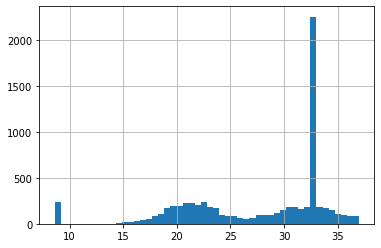

In [ ]:
data_train.loc[data_train.LifeSquare < 37, 'LifeSquare'].hist(bins=50)

In [ ]:
#обработка KitchenSquare
data_train.KitchenSquare.describe()

count    10000.000000
mean         6.273300
std         28.560917
min          0.000000
25%          1.000000
50%          6.000000
75%          9.000000
max       2014.000000
Name: KitchenSquare, dtype: float64

In [ ]:
data_train.loc[data_train.KitchenSquare > data_train.Square].head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1064,14656,62,1.0,47.100719,46.447960,2014.0,4,1.0,2014,0.072158,B,B,2,629,1,NaN,0,0,A,108337.484207
5149,13703,42,1.0,38.071692,19.723548,73.0,9,10.0,2006,0.158249,B,B,21,5731,0,NaN,1,0,B,160488.033165
7088,6569,27,1.0,38.220258,18.716856,84.0,4,17.0,2018,0.011654,B,B,4,915,0,NaN,0,0,B,99079.960518
8584,14679,81,1.0,32.276663,19.278394,1970.0,6,1.0,1977,0.006076,B,B,30,5285,0,645.0,6,6,B,105539.556275


In [ ]:
def kitchensquare_value_correct(X):
  X.loc[X.KitchenSquare > X.Square, 'KitchenSquare'] = X.loc[X.KitchenSquare > X.Square, 'Square'] - X.loc[X.KitchenSquare > X.Square, 'LifeSquare']
  

In [ ]:
kitchensquare_value_correct(data_train)
kitchensquare_value_correct(data_test)

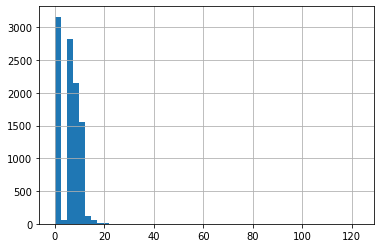

In [ ]:
data_train.KitchenSquare.hist(bins=50)

In [ ]:
#обработка HouseFloor
data_train.HouseFloor.describe()

count    10000.000000
mean        12.609400
std          6.775974
min          0.000000
25%          9.000000
50%         13.000000
75%         17.000000
max        117.000000
Name: HouseFloor, dtype: float64

In [ ]:
def house_floor_null(X):

    house_floor_null = np.where(X.HouseFloor==0)[0]

    X.loc[house_floor_null,['HouseFloor']] = X.Floor.median()


In [ ]:
house_floor_null(data_train)
house_floor_null(data_test)

In [ ]:
data_train.loc[data_train.Floor > data_train.HouseFloor].head()
#судя по данным кажется, что ошибка скорее в признаке HouseFloor, поэтому замену я проведу в колонке HouseFloor

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
7,11993,74,2.0,80.312926,32.781260,0.0,14,7.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,221244.156664
14,10953,27,1.0,53.769097,52.408027,1.0,5,4.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,140647.565937
16,2119,27,2.0,49.360648,31.993964,5.0,6,5.0,1983,0.051815,B,B,5,1227,0,NaN,0,0,B,117000.381287
21,11935,27,2.0,64.711835,32.781260,1.0,15,1.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,127200.026511
26,4378,27,3.0,106.958871,8.605112,0.0,17,7.0,2018,0.072158,B,B,2,629,1,NaN,0,0,A,337299.867936


In [ ]:
def house_floor_correct(X):
  X.loc[X.Floor > X.HouseFloor, 'HouseFloor'] = X.loc[X.Floor > X.HouseFloor, 'Floor'] + 1

In [ ]:
house_floor_correct(data_test)
house_floor_correct(data_train)

In [ ]:
data_train.loc[data_train.Floor > data_train.HouseFloor].nunique().sum()

0

In [ ]:
data_train.loc[data_train.HouseFloor].head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
9.0,8649,23,1.0,46.461409,18.915552,8.0,13,17.0,2014,0.075779,B,B,6,1437,3,NaN,0,2,B,95380.220993
9.0,8649,23,1.0,46.461409,18.915552,8.0,13,17.0,2014,0.075779,B,B,6,1437,3,NaN,0,2,B,95380.220993
12.0,6452,13,2.0,54.522805,31.759753,1.0,8,12.0,1999,0.090799,B,B,74,19083,2,NaN,5,15,B,229220.372609
17.0,3000,34,2.0,57.969964,32.012483,9.0,6,14.0,2001,0.069753,B,B,53,13670,4,NaN,1,11,B,231828.437667
12.0,6452,13,2.0,54.522805,31.759753,1.0,8,12.0,1999,0.090799,B,B,74,19083,2,NaN,5,15,B,229220.372609


In [ ]:
#обработка HouseYear
data_train.HouseYear.describe()

count    1.000000e+04
mean     3.990166e+03
std      2.005003e+05
min      1.910000e+03
25%      1.974000e+03
50%      1.977000e+03
75%      2.001000e+03
max      2.005201e+07
Name: HouseYear, dtype: float64

In [ ]:
#заменим выбросы на медиану
def house_year_correct(X):
  X.loc[X.HouseYear > 2021, 'HouseYear'] = X.HouseYear.median()

In [ ]:
house_year_correct(data_train)
house_year_correct(data_test)

In [ ]:
data_train.HouseYear.describe()

count    10000.000000
mean      1984.863800
std         18.409979
min       1910.000000
25%       1974.000000
50%       1977.000000
75%       2001.000000
max       2020.000000
Name: HouseYear, dtype: float64

In [ ]:
#обработка категориальных переменных
data_train = pd.get_dummies(data_train)
data_test = pd.get_dummies(data_test)

In [ ]:
#обработка HealhCare_1
data_train.Healthcare_1.isna().sum() / data_train.shape[0]
#поскольку пропущенных значений почти половина, а интерпретировать эти данные трудно, я их удаляю из датасетов

0.4798

In [ ]:
data_train.drop(columns='Healthcare_1', inplace=True)
data_test.drop(columns='Healthcare_1',inplace=True)

In [ ]:
data_test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,11,2748,1,0,0,0,1,0,1,0,1
1,15856,74,2.0,69.263183,32.925087,1.0,6,7.0,1977,0.075779,6,1437,3,0,2,0,1,0,1,0,1
2,5480,190,1.0,13.597819,8.277780,12.0,2,5.0,1909,0.000000,30,7538,87,5,5,0,1,0,1,0,1
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,23,4583,3,3,3,0,1,0,1,0,1
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,2,629,1,0,0,0,1,0,1,1,0


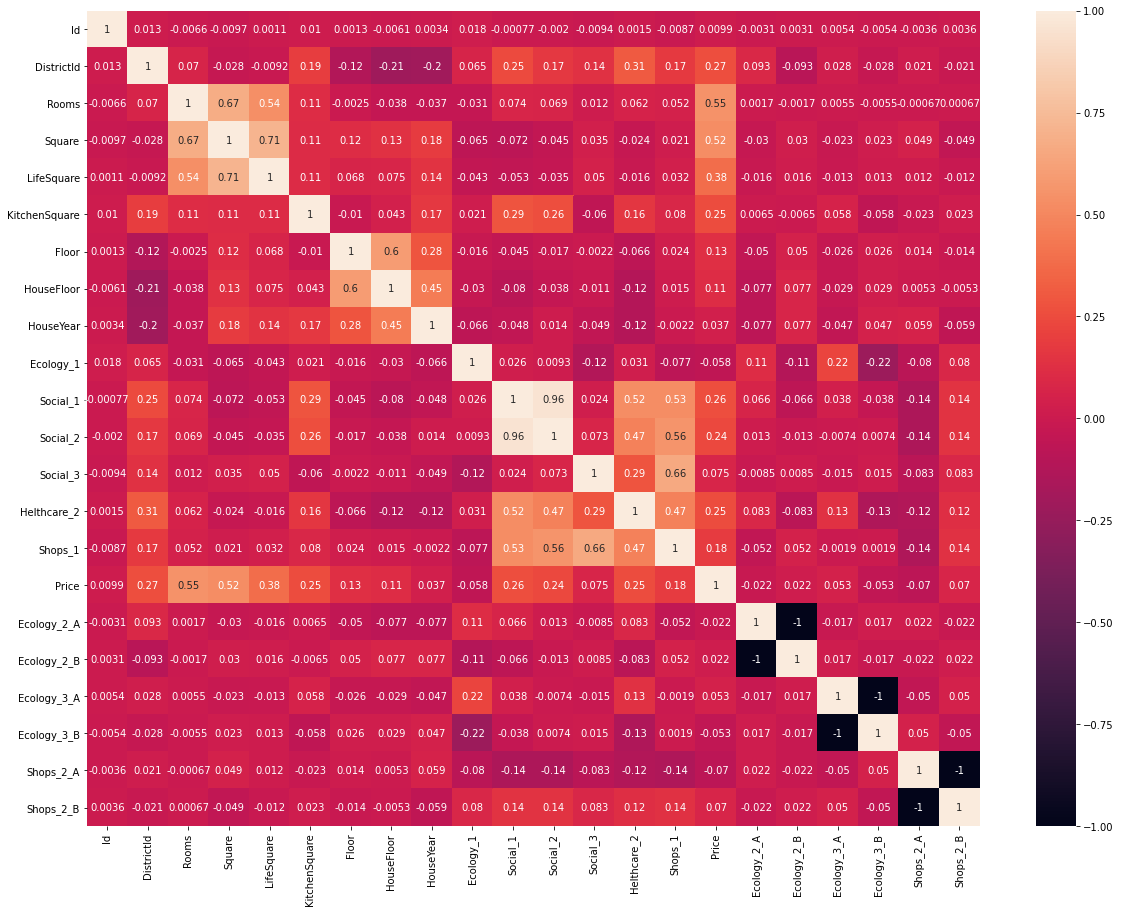

In [ ]:
#изучим взаимодействие признаков грфически
fig, ax = plt.subplots(figsize=(20,15)) 
ax = sns.heatmap(data_train.corr(),annot=True)

In [ ]:
#Видим, что наиболее значимый вклад вносят признаки DistrictID, Rooms, Square, LifeSquare, KitchenSquare, Social_1/2, Helrhcare_2

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


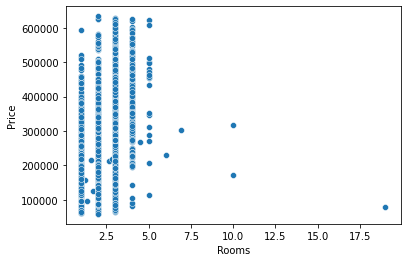

In [ ]:
sns.scatterplot(data_train.Rooms, data_train.Price)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


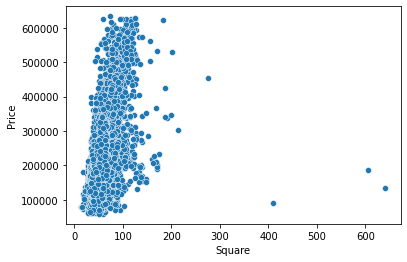

In [ ]:
sns.scatterplot(data_train.Square, data_train.Price)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


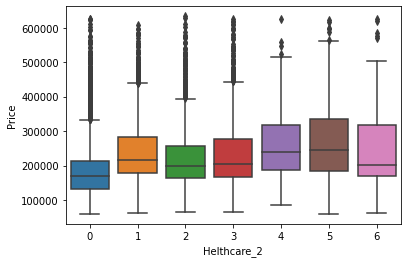

In [ ]:
sns.boxplot(data_train.Helthcare_2, data_train.Price)

**Добавляем новые фичи**

In [ ]:
price_of_square = data_train.Price / data_train.Square
price_of_square

0       3854.958571
1       4567.491245
2       4915.149522
3       3291.591637
4       3788.892642
           ...     
9995    3902.328381
9996    4553.064815
9997    3319.714218
9998    4164.786044
9999    5656.401733
Length: 10000, dtype: float64

In [151]:
data_train['price_of_square'] = price_of_square
data_train.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,Rooms_space,category_floor,Rooms_log,Square_log,LifeSquare_log,Floor_log,HouseFloor_log,HouseYear_log,Claster,price_of_square
0,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,33,7976,5,0,11,184966.930730,0,1,0,1,0,1,14.721375,0.0,0.693147,3.870817,3.382448,1.945910,2.197225,7.585281,1.0,3854.958571
1,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,46,10309,1,1,16,300009.450063,0,1,0,1,0,1,13.349848,0.0,1.098612,4.184850,3.690117,1.945910,2.197225,7.589842,0.0,4567.491245
2,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,34,7759,0,1,3,220925.908524,0,1,0,1,0,1,14.598806,0.0,0.693147,3.805505,3.374087,2.079442,2.484907,7.584773,1.0,4915.149522
3,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,23,5735,3,0,5,175616.227217,0,1,0,1,0,1,26.365756,0.0,0.693147,3.976930,3.965213,2.079442,2.833213,7.589336,0.0,3291.591637
4,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,35,5776,1,2,4,150226.531644,0,1,0,1,0,1,23.776169,0.0,0.000000,3.680071,3.168684,2.397895,2.484907,7.588830,1.0,3788.892642


In [154]:
price_of_square_by_Id = data_train.groupby('DistrictId').agg({'price_of_square':'median'}).rename(columns={'price_of_square':'price_of_square_by_Id'})

In [201]:
data_train = data_train.merge(price_of_square_by_Id,on='DistrictId',how='left')


In [202]:
data_train.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,Rooms_space,category_floor,Rooms_log,Square_log,LifeSquare_log,Floor_log,HouseFloor_log,HouseYear_log,Claster,price_of_square,price_of_square_by_Id
0,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,33,7976,5,0,11,184966.930730,0,1,0,1,0,1,14.721375,0.0,0.693147,3.870817,3.382448,1.945910,2.197225,7.585281,1.0,3854.958571,4358.274853
1,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,46,10309,1,1,16,300009.450063,0,1,0,1,0,1,13.349848,0.0,1.098612,4.184850,3.690117,1.945910,2.197225,7.589842,0.0,4567.491245,4437.304072
2,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,34,7759,0,1,3,220925.908524,0,1,0,1,0,1,14.598806,0.0,0.693147,3.805505,3.374087,2.079442,2.484907,7.584773,1.0,4915.149522,4845.919064
3,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,23,5735,3,0,5,175616.227217,0,1,0,1,0,1,26.365756,0.0,0.693147,3.976930,3.965213,2.079442,2.833213,7.589336,0.0,3291.591637,2949.975415
4,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,35,5776,1,2,4,150226.531644,0,1,0,1,0,1,23.776169,0.0,0.000000,3.680071,3.168684,2.397895,2.484907,7.588830,1.0,3788.892642,3992.031265


In [203]:
data_test = data_test.merge(price_of_square_by_Id,on='DistrictId',how='left')

In [211]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DistrictId             5000 non-null   int64  
 1   Rooms                  5000 non-null   float64
 2   Square                 5000 non-null   float64
 3   LifeSquare             5000 non-null   float64
 4   KitchenSquare          5000 non-null   float64
 5   Floor                  5000 non-null   int64  
 6   HouseFloor             5000 non-null   float64
 7   HouseYear              5000 non-null   int64  
 8   Ecology_1              5000 non-null   float64
 9   Social_1               5000 non-null   int64  
 10  Social_2               5000 non-null   int64  
 11  Social_3               5000 non-null   int64  
 12  Helthcare_2            5000 non-null   int64  
 13  Shops_1                5000 non-null   int64  
 14  Ecology_2_A            5000 non-null   uint8  
 15  Ecol

In [213]:
data_test.fillna(data_test.price_of_square_by_Id.median(),inplace=True)

In [ ]:
#поскольку возможно важным для покупки не сколько количество комнат, но и их простор, добавим фичу
data_train['Rooms_space'] = data_train.LifeSquare / data_train.Rooms
data_test['Rooms_space'] = data_test.LifeSquare / data_test.Rooms

In [ ]:
#создадим переменную отвечающую за относительное расположение дома по этажу
data_train['category_floor'] = data_train['HouseFloor'] - data_train['Floor']
data_test['category_floor'] = data_test['HouseFloor'] - data_test['Floor']

In [ ]:
#категория 0 - последний этаж, категория 1 - первый этаж, категория 2 - остальные
# data_train.loc[data_train.category_floor == 0,'category_floor'] = 0 #по boxplot было видно, что нет разницы межу категориями 0 и 2
data_train.loc[data_train.Floor == 1,'category_floor'] = 1
data_train.loc[data_train.Floor != 1,'category_floor'] = 0
data_test.loc[data_test.Floor == 1,'category_floor'] = 1
data_test.loc[data_test.Floor != 1,'category_floor'] = 0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


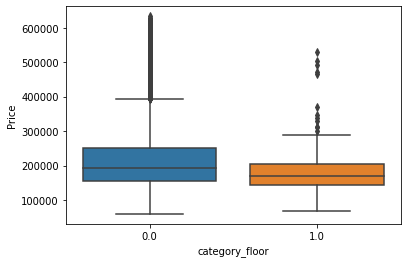

In [ ]:
sns.boxplot(data_train.category_floor, data_train.Price);

In [ ]:
#поскольку почти все данные имеют смещение, прологарифмируем
feature_name = ['Rooms','Square','LifeSquare','Floor','HouseFloor','HouseYear']
feature_name_log = []
for i in feature_name:
    data_train[i +'_log'] = np.log(data_train[i])
    data_test[i+'_log'] = np.log(data_test[i])
    feature_name_log.append(i + '_log')

In [ ]:
#для работы нам не нужен ID
data_train.drop(columns='Id',inplace=True)
data_test.drop(columns='Id', inplace=True)

In [159]:
data_test.shape

(5000, 29)

In [ ]:
data_train.info()

In [215]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DistrictId             5000 non-null   int64  
 1   Rooms                  5000 non-null   float64
 2   Square                 5000 non-null   float64
 3   LifeSquare             5000 non-null   float64
 4   KitchenSquare          5000 non-null   float64
 5   Floor                  5000 non-null   int64  
 6   HouseFloor             5000 non-null   float64
 7   HouseYear              5000 non-null   int64  
 8   Ecology_1              5000 non-null   float64
 9   Social_1               5000 non-null   int64  
 10  Social_2               5000 non-null   int64  
 11  Social_3               5000 non-null   int64  
 12  Helthcare_2            5000 non-null   int64  
 13  Shops_1                5000 non-null   int64  
 14  Ecology_2_A            5000 non-null   uint8  
 15  Ecol

In [205]:
#разделяем набор данных на учебный и валидный
y = data_train.Price
X = data_train.drop(columns=['Price','price_of_square'])

In [216]:
#рассмотрим данные с точки зрения возмодной кластеризации
scaler = StandardScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
test_scaled = pd.DataFrame(scaler.transform(data_test), columns=data_test.columns)

In [207]:
tsne = TSNE(n_components=2, learning_rate=150, random_state=100)

X_tsne = tsne.fit_transform(X_scaled)

In [217]:
test_tsne = tsne.fit_transform(test_scaled)

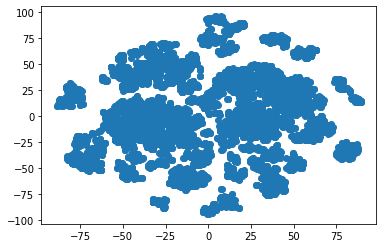

In [218]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])

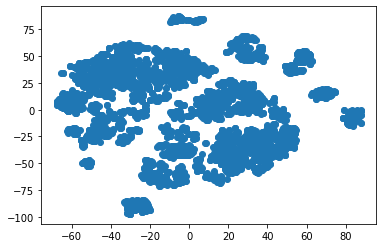

In [219]:
plt.scatter(test_tsne[:,0], test_tsne[:,1])

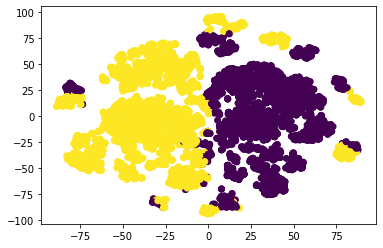

In [220]:
kmeans = KMeans(n_clusters=2,random_state=100)

labels_train = kmeans.fit_predict(X_scaled)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1],c=labels_train)

plt.show()

In [221]:
test_labels = kmeans.predict(test_scaled)

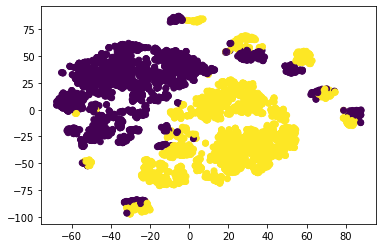

In [222]:
plt.scatter(test_tsne[:, 0], test_tsne[:, 1],c=test_labels)

In [223]:
y[labels_train==0].mean()

263234.85833731777

In [ ]:
y[labels_train==1].mean()

In [ ]:
#как видим, средние в разных кластерах отличаются 

/usr/local/lib/python3.7/dist-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


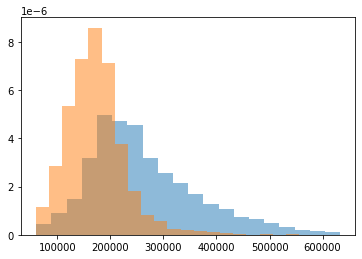

In [224]:
plt.hist(y[labels_train == 0], bins=20, density=True, alpha=0.5)
plt.hist(y[labels_train == 1], bins=20, density=True, alpha=0.5)
plt.hist(y[labels_train == 2], bins=20, density=True, alpha=0.5);

In [225]:
X_scaled.loc[labels_train == 1, 'claster'] = 1
X_scaled.loc[labels_train == 0, 'claster'] = 0


In [226]:
test_scaled.loc[test_labels == 0, 'claster'] = 0
test_scaled.loc[test_labels == 1, 'claster'] = 1


In [227]:
X['Claster'] = X_scaled['claster']

In [228]:
data_test['Claster'] = test_scaled['claster']

In [229]:
data_train['Claster'] = X_scaled['claster']

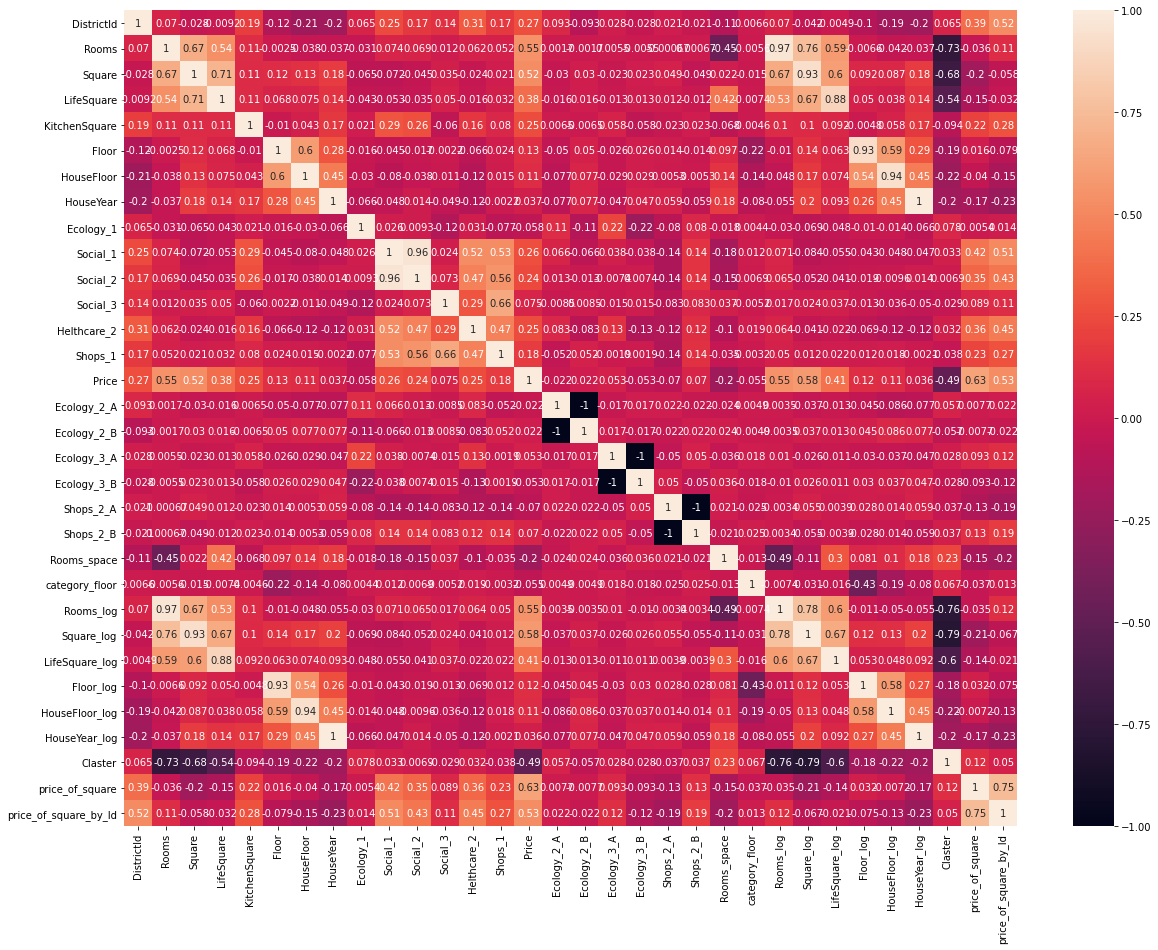

In [230]:
#изучим взаимодействие признаков графически
fig, ax = plt.subplots(figsize=(20,15)) 
ax = sns.heatmap(data_train.corr(),annot=True)

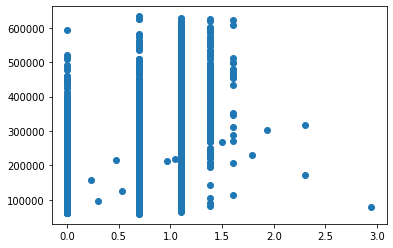

In [ ]:
plt.scatter(data_train.Rooms_log, data_train.Price)

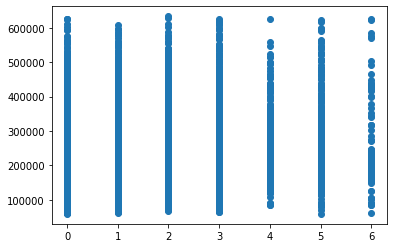

In [ ]:
plt.scatter(data_train.Helthcare_2, data_train.Price)

**Тестируем модели**

In [238]:
data_train.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,Rooms_space,category_floor,Rooms_log,Square_log,LifeSquare_log,Floor_log,HouseFloor_log,HouseYear_log,Claster,price_of_square,price_of_square_by_Id
0,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,33,7976,5,0,11,184966.930730,0,1,0,1,0,1,14.721375,0.0,0.693147,3.870817,3.382448,1.945910,2.197225,7.585281,1.0,3854.958571,4358.274853
1,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,46,10309,1,1,16,300009.450063,0,1,0,1,0,1,13.349848,0.0,1.098612,4.184850,3.690117,1.945910,2.197225,7.589842,0.0,4567.491245,4437.304072
2,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,34,7759,0,1,3,220925.908524,0,1,0,1,0,1,14.598806,0.0,0.693147,3.805505,3.374087,2.079442,2.484907,7.584773,1.0,4915.149522,4845.919064
3,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,23,5735,3,0,5,175616.227217,0,1,0,1,0,1,26.365756,0.0,0.693147,3.976930,3.965213,2.079442,2.833213,7.589336,0.0,3291.591637,2949.975415
4,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,35,5776,1,2,4,150226.531644,0,1,0,1,0,1,23.776169,0.0,0.000000,3.680071,3.168684,2.397895,2.484907,7.588830,1.0,3788.892642,3992.031265


In [239]:
X.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,Rooms_space,category_floor,Rooms_log,Square_log,LifeSquare_log,Floor_log,HouseFloor_log,HouseYear_log,Claster,price_of_square_by_Id
0,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,33,7976,5,0,11,0,1,0,1,0,1,14.721375,0.0,0.693147,3.870817,3.382448,1.945910,2.197225,7.585281,1.0,4358.274853
1,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,46,10309,1,1,16,0,1,0,1,0,1,13.349848,0.0,1.098612,4.184850,3.690117,1.945910,2.197225,7.589842,0.0,4437.304072
2,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,34,7759,0,1,3,0,1,0,1,0,1,14.598806,0.0,0.693147,3.805505,3.374087,2.079442,2.484907,7.584773,1.0,4845.919064
3,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,23,5735,3,0,5,0,1,0,1,0,1,26.365756,0.0,0.693147,3.976930,3.965213,2.079442,2.833213,7.589336,0.0,2949.975415
4,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,35,5776,1,2,4,0,1,0,1,0,1,23.776169,0.0,0.000000,3.680071,3.168684,2.397895,2.484907,7.588830,1.0,3992.031265


In [231]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [240]:
X_train.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,Rooms_space,category_floor,Rooms_log,Square_log,LifeSquare_log,Floor_log,HouseFloor_log,HouseYear_log,Claster,price_of_square_by_Id
9254,58,1.0,65.271225,62.798045,1.0,3,4.0,1977,0.437885,23,5735,3,0,5,0,1,0,1,0,1,62.798045,0.0,0.000000,4.178551,4.139924,1.098612,1.386294,7.589336,1.0,2949.975415
1561,146,2.0,45.091598,43.816601,1.0,5,18.0,2017,0.236108,16,3893,27,3,10,0,1,0,1,0,1,21.908301,0.0,0.693147,3.808696,3.780013,1.609438,2.890372,7.609367,0.0,4822.201774
1670,5,1.0,34.463114,20.561823,5.0,3,5.0,1960,0.150818,16,3433,4,4,5,0,1,0,1,0,1,20.561823,0.0,0.000000,3.539890,3.023436,1.098612,1.609438,7.580700,1.0,4853.266405
6087,90,3.0,61.931107,46.126389,5.0,4,5.0,1966,0.265089,37,5288,0,3,2,0,1,0,1,0,1,15.375463,0.0,1.098612,4.126023,3.831385,1.386294,1.609438,7.583756,0.0,4451.242829
6669,1,1.0,42.670840,32.781260,1.0,8,17.0,1977,0.007122,1,264,0,0,1,0,1,0,1,0,1,32.781260,0.0,0.000000,3.753516,3.489857,2.079442,2.833213,7.589336,1.0,3251.647396


In [232]:
def metrics(valid, model_predict):
  print(f'R2 = {r2_score(valid, model_predict.predict(X_valid))}')
  print(f'MAE = {mae(valid,model_predict.predict(X_valid))}')

In [ ]:
#После тестов лучший результат показал алгоритм CatboostRegressor

In [ ]:
# lm = LinearRegression()

In [ ]:
# lm.fit(X_train, y_train)

In [ ]:
# metrics(y_valid, lm)

In [ ]:
# RFR = RandomForestRegressor(n_estimators=250,max_depth=10)

In [ ]:
# params = {
#     'n_estimators' : [100,150,200],
#     'max_depth' : [3,5,8,10],
#     'max_features' : ('auto','sqrt', 'log2')  
# }

In [ ]:
# RFR = GridSearchCV(RFR, params,cv=5)

In [ ]:
# RFR.fit(X_train, y_train)

In [ ]:
# metrics(y_valid,RFR)

In [ ]:
# gbr = GradientBoostingRegressor()
# gbr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
# metrics(y_valid, gbr)

R2 = 0.7020776512265441
MAE = 31037.001509920443


In [ ]:
# parameters = {'n_estimators':[150, 250, 500], 'max_depth':[3,5,7,10]}

In [ ]:
# gbr_grid = GridSearchCV(gbr, parameters)

In [ ]:
# %%time
# gbr_grid.fit(X_train, y_train)

In [ ]:
# gbr_grid.best_params_

In [ ]:
# metrics(y_valid, gbr_grid.best_estimator_)

In [233]:
CBR = cb.CatBoostRegressor()

In [ ]:
%%time
CBR.fit(X_train,y_train)

In [235]:
metrics(y_valid, CBR)

R2 = 0.7453165480769397
MAE = 26778.55379498209


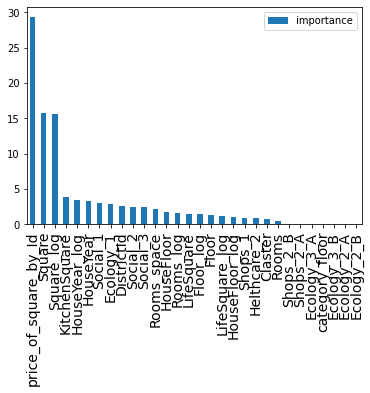

In [237]:
#на лучше моделе посмотрим ценность фичей 
feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': CBR.feature_importances_})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)
feature_importances.reset_index(drop=True).plot(kind='bar')
plt.xticks(ticks=range(feature_importances.shape[0]), labels=feature_importances.feature,size=14);



In [245]:
feature_names_final = ['price_of_square_by_Id','Square_log','Square','Social_2','Social_3','DistrictId','Ecology_1','Rooms_log','Rooms', \
'KitchenSquare','HouseYear','Shops_1','Rooms_space','HouseYear_log','LifeSquare','Floor','LifeSquare_log', \
'HouseFloor','Floor_log','HouseFloor_log','Helthcare_2','Claster']

In [ ]:
%%time
CBR.fit(X_train[feature_names_final],y_train)

In [247]:
metrics(y_valid, CBR)

R2 = 0.7436953472729175
MAE = 26742.230341500515


In [250]:
# model = cb.CatBoostRegressor()

In [ ]:
# grid = {'learning_rate': [0.02, 0.05, 0.1],
#         'depth': np.arange(6,12)}

# grid_search_result = model.grid_search(grid, 
#                                        X=X_train, 
#                                        y=y_train, 
#                                        plot=True)

In [ ]:
grid_search_result

In [276]:
#гиперпараметры настроены на Grid
model = cb.CatBoostRegressor(depth=8,learning_rate=0.023)

In [ ]:
model.fit(X_train[feature_names_final],y_train)

In [278]:
metrics(y_valid,model)

R2 = 0.7452262771148706
MAE = 26763.011902734183


In [ ]:
final_model = model.fit(X[feature_names_final],y)

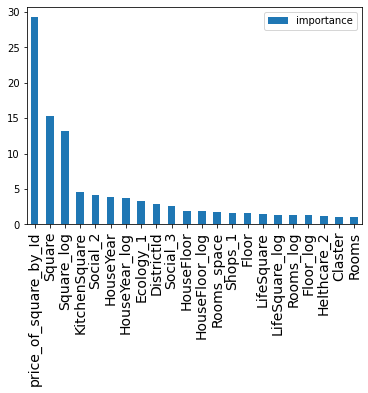

In [281]:
#на лучше моделе посмотрим ценность фичей 
feature_importances = pd.DataFrame({'feature': X[feature_names_final].columns, 'importance': final_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)
feature_importances.reset_index(drop=True).plot(kind='bar')
plt.xticks(ticks=range(feature_importances.shape[0]), labels=feature_importances.feature,size=14);


In [ ]:
#Создаём и сохраняем предсказание для тестовых данных.

In [282]:
files.upload()

{}

In [283]:
y_test_preds = final_model.predict(data_test[feature_names_final])

submission_df = pd.read_csv("sample_submission.csv")
submission_df['Price'] = y_test_preds
submission_df.to_csv('VSmirnov_predictions_finall.csv', index=False, encoding='utf-8', sep=',')
files.download('VSmirnov_predictions_finall.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>